In [7]:
#http://alyssaq.github.io/2015/understanding-eigenvectors-and-eigenvalues-visually/
import numpy as np
import matplotlib.pyplot as plt

def plot_points(matrix, ls='--', lw=1.2, colors=None):
  """
    Plots a 2xn matrix where 1st row are the x-coordinates 
    and 2nd row are the y-coordinates.
    
    Parameters:
    matrix - 2xn matrix
    ls - matplotlib linestyle
    lw - matplotlib linewidth
    colors - 1D array of colours (http://matplotlib.org/examples/color/named_colors.html)
  """

  x_points, y_points = matrix
  size = len(x_points)
  colors = ['red', 'blue', 'orange', 'green'] if not None else colors
  for i in range(size):
    plt.plot(x_points[i], y_points[i], color=colors[i], marker='o')
    plt.plot([x_points[i], x_points[(i+1) % size]], 
             [y_points[i], y_points[(i+1) % size]], 
             color=colors[i], linestyle=ls, linewidth=lw)
    
def plot_point_label(prefix, point, location):
  """
    Plots a (x, y) point as a label
    
    Parameters:
    prefix - The name given to the point. E.g. 'p1'
    point - 1D array of [x, y]
    location - tuple coordinates of the label
  """
  
  plt.annotate('{0}={1}'.format(prefix, tuple(map(lambda x: round(x, 2), point))), 
  xy=point, xytext=location, textcoords='data', color='white', weight='semibold',
  bbox=dict(fc='navy', alpha=0.6, ec='none'), arrowprops=dict(arrowstyle='->'))

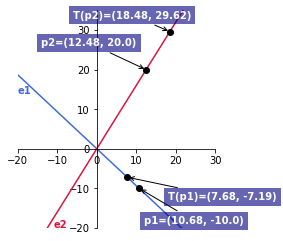

In [8]:
A = np.matrix([[1, 0.3], [0.45, 1.2]])
#matrix = np.matrix([[2, 0],[0, 3]])
#transformed_matrix = A * matrix

#plot_points(matrix)
#plot_points(transformed_matrix.A, '-', lw=3.0)
evals, evecs = np.linalg.eig(A)

x_v1, y_v1 = evecs[:,0].getA1()
x_v2, y_v2 = evecs[:,1].getA1()
m1 = y_v1/x_v1  # Gradient of 1st eigenvector
m2 = y_v2/x_v2  # Gradient of 2nd eigenvector

p1 = [-10/m1, -10]  # 1st point at y = -10
p2 = [20/m2, 20]    # 2nd point at y = -20
trans_p1 = A*np.matrix(p1).T
trans_p2 = A*np.matrix(p2).T

# Plot eigenvectors and labels
plt.plot([x_v1*-50, x_v1*50], [y_v1*-50, y_v1*50], color='royalblue')
plt.plot([x_v2*-50, x_v2*50], [y_v2*-50, y_v2*50], color='crimson')
plt.annotate('e1', xy=(-20, 14),textcoords='data', weight='semibold', color='royalblue')
plt.annotate('e2', xy=(-11, -20),textcoords='data', weight='semibold', color='crimson')

# Plot the points where the eigenvector line and original points intersect
plt.plot(p1[0], p1[1], 'ko')
plt.plot(p2[0], p2[1], 'ko')

# Plot the transformed points that lie on the eigenvector line
plt.plot(trans_p1[0,0], trans_p1[1,0], 'ko')
plt.plot(trans_p2[0,0], trans_p2[1,0], 'ko')

# Plot the point labels
plot_point_label('p1', p1, (12, -19))
plot_point_label('T(p1)', trans_p1.A1, (18, -13))
plot_point_label('p2', p2, (-14, 26))
plot_point_label('T(p2)', trans_p2.A1, (-6, 33))

# Set the axes
ax = plt.axes() 
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_aspect('equal')

# Limit the plot
plt.xlim([-20, 30])
plt.ylim([-20, 35])
plt.show()